In [79]:
import pandas as pd

Import data

In [80]:
data = pd.read_csv('/content/all_data.csv')

In [81]:
data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['problem', 'level', 'type', 'modified_problem', 'no_of_equations',
       'no_of_variables', 'has_exp_or_mod', 'has_logarithm', 'has_fraction',
       'has_eq_or_neq', 'sentence_count', 'word_count', 'words_per_sentence',
       'average_word_length', 'large_words', 'has_repeated_large_words',
       'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC',
       'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT',
       'QUANTITY', 'TIME', 'WORK_OF_ART', 'ADJ', 'ADP', 'ADV', 'AUX', 'CONJ',
       'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT',
       'SCONJ', 'SYM', 'VERB', 'X'],
      dtype='object')

In [82]:
data.type.value_counts()

Algebra                 1736
Intermediate Algebra    1295
Prealgebra              1205
Name: type, dtype: int64

Convert type collumn to numerical

In [83]:
size_mapping = {"Prealgebra": 1, "Intermediate Algebra": 2, "Algebra": 3}
data['type'] = data['type'].replace(size_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Remove some unnecessary columns

In [84]:
data.drop(columns = ['problem', 'modified_problem'], inplace = True)

In [85]:
data.drop(columns = [ 'LOC', 'LANGUAGE', 'CONJ', 'INTJ', 'EVENT', 'LAW'], inplace = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
data1 = data    # storing a duplicate variable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


definition for combining levels

In [87]:
# To make 3 classes we have three possibilities
# combination 1 - (1,2),(3,4),5
# combination 2 - (1,2),3,(4,5)
# combination 3 - 1,(2,3),(4,5)

def combine(combination, data):   # level_w and level_x will be combined, level_y and level_z will be combined
    for i in range(data.shape[0]):
        if (combination == 1) or (combination == 2):
          if data['level'][i] == 'Level 2':
            data['level'][i] = 'Level 1'
            continue
        if (combination == 1):
          if (data['level'][i] == 'Level 4') or (data['level'][i] == 'Level 3'):
            data['level'][i] = 'Level 2'
            continue
        if (combination == 1):
          if data['level'][i] == 'Level 5':
            data['level'][i] = 'Level 3'
            continue
        if (combination == 2):
          if data['level'][i] == 'Level 3':
            data['level'][i] = 'Level 2'
            continue
        if (combination == 3):
          if (data['level'][i] == 'Level 3'):
            data['level'][i] = 'Level 2'
            continue
        if (combination == 2) or (combination == 3):
          if (data['level'][i] == 'Level 4') or (data['level'][i] == 'Level 5'):
            data['level'][i] = 'Level 3'
            continue

    # for i in range(data.shape[0]):
    #   if data['level'][i] == 'Level 3':
    #     data['level'][i] = 'Level 2'
    #   if data['level'][i] == 'Level 4':
    #     data['level'][i] = 'Level 3'
    #   if data['level'][i] == 'Level 5':
    #     data['level'][i] = 'Level 3'
 

Converting level column to numetical

In [88]:
# for i in range(data.shape[0]):
#   data['level'][i] = data['level'][i][6]

In [89]:
data1['level'].value_counts()

Level 5    1116
Level 4     983
Level 3     943
Level 2     832
Level 1     362
Name: level, dtype: int64

Heat-map function for confusion matrix

In [90]:
import numpy as np
import matplotlib.pyplot as plt

labels = ["Level 0", "Level 1", "Level 2"]

def plot_confusion_matrix(confusion_matrix, labels):
    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap='Blues')

    # Set labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black")

    # Set colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Set title and labels
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

    # Show the plot
    plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Evaluation function for predicted values

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluation(y_train_pred, y_test_pred, y_train, y_test):
  print("train_evaluation:\n")
  print(classification_report(y_train_pred, y_train))
  print(plot_confusion_matrix(confusion_matrix(y_train_pred, y_train), labels))
  print("\ntest_evaluation:\n")
  print(classification_report(y_test_pred, y_test))
  print(plot_confusion_matrix(confusion_matrix(y_test_pred, y_test), labels))

model building and evaluation

In [92]:
# importing all libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import warnings

def model(data, test_size = 0.2, use_smote_technique = 0, combination = 0, combination_required = 0):
    
    data1 = data

    # Combining the levels
    if combination_required == 1:
        combine(combination, data1)

    # Seperate the target variable 
    X = data1.drop(columns = ['level'])
    y = data1['level']
    
    # Smote the data
    if use_smote_technique == 1:
        # Count the class distribution before applying SMOTE
        print("Class distribution before SMOTE:", Counter(y))

        # Apply SMOTE to the dataset
        smote = SMOTE(random_state=42)
        X, y = smote.fit_resample(X, y)

        # Count the class distribution after applying SMOTE
        print("Class distribution after SMOTE:", Counter(y))

    data1['level'].value_counts()

    # Split the data into test and train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 2, stratify = y)

    # Random Forest Classifier - Machine Learning Model
    rfc=RandomForestClassifier(n_estimators=15, n_jobs=-1)
    param_grid = {
        'max_depth': [3, 5, 7],                      # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split a node
        'min_samples_leaf': [1, 2, 3],               # Minimum number of samples required at a leaf node
        'max_features': ['auto', 'sqrt', 'log2'],    # Number of features to consider at each split
        'criterion': ['gini', 'entropy', 'log_loss'],
        'oob_score': [True],
        # 'class_weight': ['balanced', 'balanced_subsample']    
    }

    # Filter scikit-learn warnings
    warnings.filterwarnings("ignore")

    # Perform grid search to find the best combination of parameters
    grid_search = GridSearchCV(rfc, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Obtain the best values and best score
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)

    # Evaluation of model
    y_test_pred = grid_search.predict(X_test)
    y_train_pred = grid_search.predict(X_train)
    print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

    # Restore warning filter
    warnings.filterwarnings("default")

    # obtain Best Features
    best_model = grid_search.best_estimator_
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    print("Feature Importance Rankings:")
    for i, feature in enumerate(X.columns[indices]):
        print(f"{i + 1}. {feature}: {importances[indices[i]] * 100}")

combination 1 - (1,2),(3,4),5  - [without smoting]

<ipython-input-9-95b394b2ecb5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level'][i] = 'Level 3'
<ipython-input-9-95b394b2ecb5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level'][i] = 'Level 2'
<ipython-input-9-95b394b2ecb5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level'][i] = 'Level 1'


Best Parameters:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'oob_score': True}
Best Score:  0.5330592628418801
train_evaluation:

              precision    recall  f1-score   support

     Level 1       0.48      0.73      0.58       633
     Level 2       0.85      0.56      0.68      2325
     Level 3       0.36      0.75      0.49       430

    accuracy                           0.62      3388
   macro avg       0.56      0.68      0.58      3388
weighted avg       0.72      0.62      0.63      3388



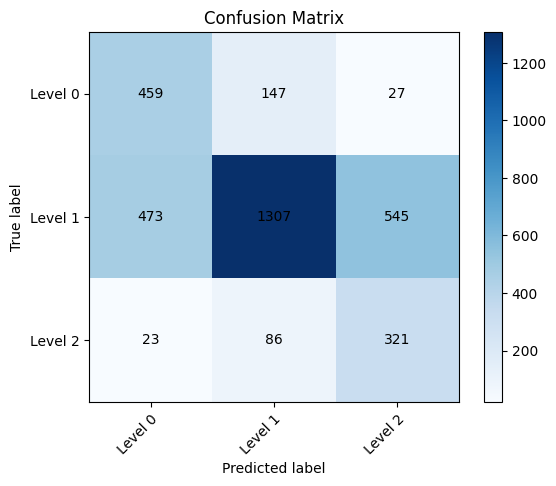

None

test_evaluation:

              precision    recall  f1-score   support

     Level 1       0.36      0.58      0.44       146
     Level 2       0.76      0.49      0.59       598
     Level 3       0.25      0.54      0.34       104

    accuracy                           0.51       848
   macro avg       0.45      0.54      0.46       848
weighted avg       0.63      0.51      0.54       848



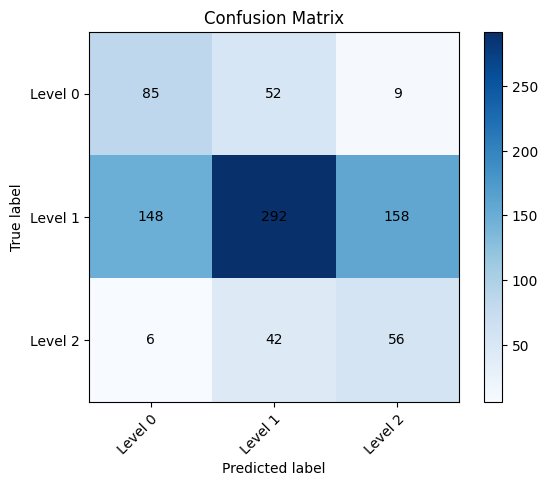

None
None
Feature Importance Rankings:
1. no_of_variables: 9.542138778895142
2. large_words: 9.171655737373202
3. ADJ: 8.144754315438439
4. word_count: 6.817886070443356
5. NOUN: 5.535912102343218
6. DET: 5.432039527389076
7. no_of_equations: 5.241053431775307
8. words_per_sentence: 4.091037287554327
9. VERB: 4.045655525019385
10. ADP: 3.933259921820827
11. average_word_length: 3.5831293376240683
12. PUNCT: 3.572805629925746
13. has_fraction: 3.0141279887437933
14. has_eq_or_neq: 3.002503032791528
15. PRON: 2.398979106855057
16. type: 2.3047592849039082
17. ADV: 2.05407830355732
18. AUX: 1.9996360228306147
19. CARDINAL: 1.9761758131338965
20. NUM: 1.799645222878143
21. SCONJ: 1.6843870941703132
22. PROPN: 1.5689319477429458
23. CCONJ: 1.3781947255076763
24. sentence_count: 1.3112975736126586
25. PERSON: 0.994244141211973
26. has_exp_or_mod: 0.7996839827582845
27. X: 0.6642463664094489
28. PART: 0.6418381519629922
29. ORG: 0.51876274337702
30. SYM: 0.48482257020852765
31. has_repeated_l

In [15]:
model(data1, test_size = 0.2, use_smote_technique = 0, combination = 1, combination_required = 1)

Performing smote

Class distribution before SMOTE: Counter({'Level 2': 1926, 'Level 1': 1194, 'Level 3': 1116})
Class distribution after SMOTE: Counter({'Level 3': 1926, 'Level 2': 1926, 'Level 1': 1926})
Best Parameters:  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'oob_score': True}
Best Score:  0.5666399906399906
train_evaluation:

              precision    recall  f1-score   support

     Level 1       0.77      0.66      0.71      1801
     Level 2       0.40      0.68      0.50       906
     Level 3       0.78      0.63      0.69      1915

    accuracy                           0.65      4622
   macro avg       0.65      0.66      0.64      4622
weighted avg       0.70      0.65      0.66      4622



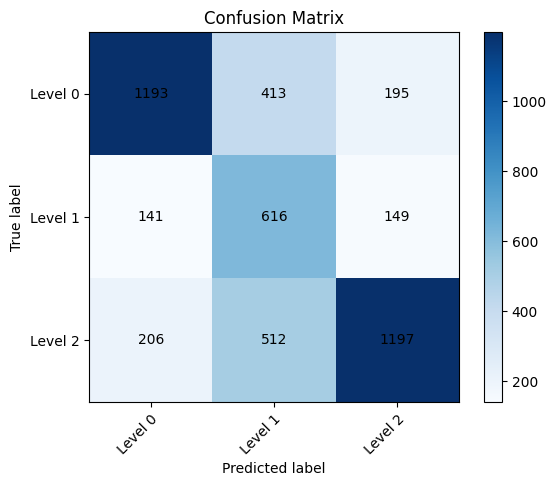

None

test_evaluation:

              precision    recall  f1-score   support

     Level 1       0.70      0.60      0.65       451
     Level 2       0.26      0.46      0.33       217
     Level 3       0.70      0.55      0.61       488

    accuracy                           0.55      1156
   macro avg       0.55      0.53      0.53      1156
weighted avg       0.62      0.55      0.57      1156



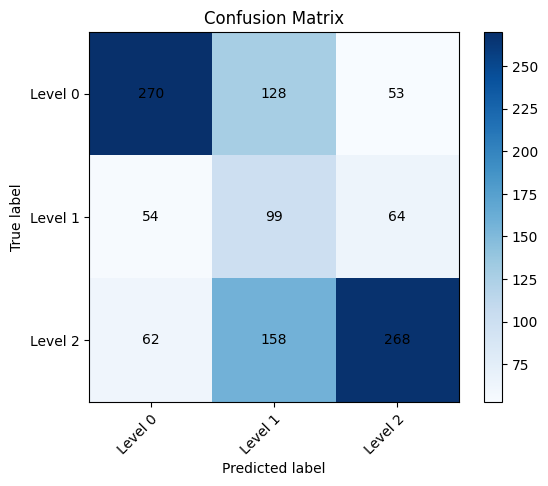

None
None
Feature Importance Rankings:
1. no_of_variables: 10.408994358692208
2. word_count: 8.239865513615579
3. large_words: 7.437056648653992
4. NOUN: 7.3250060376866655
5. no_of_equations: 6.399808728643816
6. words_per_sentence: 6.1528386137720235
7. ADJ: 5.749824522433756
8. VERB: 5.672271914041809
9. average_word_length: 4.0397801393618025
10. PUNCT: 3.974508385149448
11. ADP: 3.7158388036751338
12. has_eq_or_neq: 3.3690756694233013
13. DET: 3.324417202276935
14. type: 2.513732620054471
15. AUX: 2.2654291049202366
16. PRON: 2.003357675520444
17. PROPN: 1.6744896504053837
18. CARDINAL: 1.670531199867595
19. sentence_count: 1.5731645169970114
20. CCONJ: 1.5410592982258415
21. has_exp_or_mod: 1.5119378201155245
22. NUM: 1.4084149832754425
23. SCONJ: 1.138110354903762
24. has_fraction: 1.127609889130801
25. ADV: 1.0980783583167035
26. PERSON: 0.9582514880753958
27. ORG: 0.6653685045968268
28. X: 0.5584608420882298
29. has_repeated_large_words: 0.5365783900026306
30. DATE: 0.34682587

In [31]:
model(data1, test_size = 0.2, use_smote_technique = 1, combination = 1, combination_required = 1)

Best Parameters:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'oob_score': True}
Best Score:  0.5876629063672371
train_evaluation:

              precision    recall  f1-score   support

     Level 1       0.59      0.62      0.60       908
     Level 2       0.05      0.71      0.09        49
     Level 3       0.91      0.63      0.74      2431

    accuracy                           0.63      3388
   macro avg       0.51      0.65      0.48      3388
weighted avg       0.81      0.63      0.69      3388



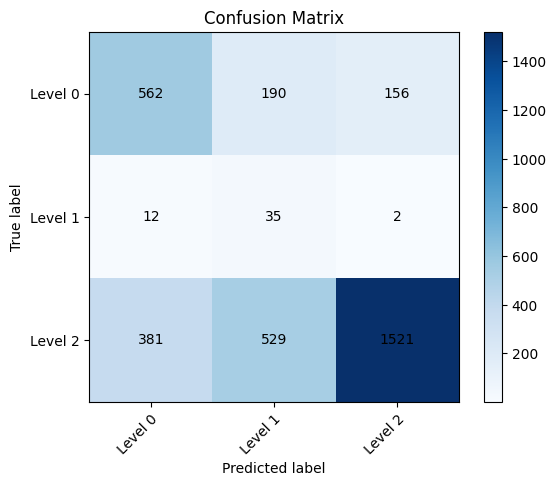

None

test_evaluation:

              precision    recall  f1-score   support

     Level 1       0.50      0.53      0.52       225
     Level 2       0.03      0.67      0.06         9
     Level 3       0.87      0.59      0.70       614

    accuracy                           0.58       848
   macro avg       0.47      0.60      0.43       848
weighted avg       0.76      0.58      0.65       848



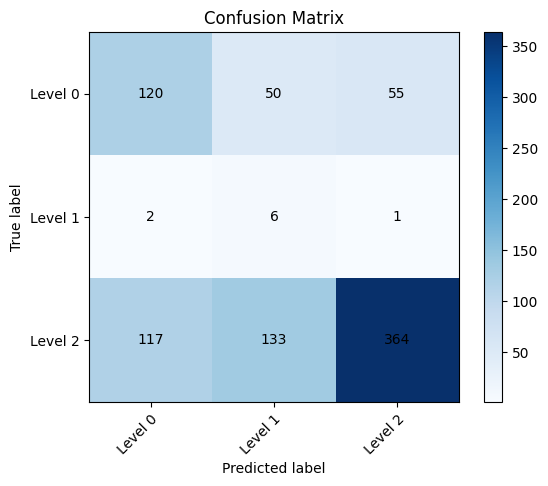

None
None
Feature Importance Rankings:
1. no_of_variables: 12.036310099847457
2. word_count: 7.5323058099687135
3. large_words: 6.607254190527836
4. PUNCT: 6.242457495735356
5. ADJ: 6.08999173156932
6. no_of_equations: 5.497301894637328
7. DET: 5.289778232274664
8. ADP: 5.267350442821936
9. words_per_sentence: 4.525835592062345
10. VERB: 4.1161578431215835
11. NOUN: 3.8794007590169066
12. average_word_length: 3.1479957917063746
13. has_eq_or_neq: 2.944564698290434
14. SCONJ: 2.5931689624851004
15. NUM: 2.1844977468511417
16. has_exp_or_mod: 2.177321124879787
17. AUX: 2.0842592015819412
18. PRON: 1.8770441140616732
19. has_fraction: 1.8597119575458665
20. type: 1.745053427373646
21. PROPN: 1.6586540015659033
22. sentence_count: 1.4004789423581216
23. CCONJ: 1.340017463622304
24. CARDINAL: 1.1585431806359872
25. ORG: 1.1087680426509396
26. ADV: 0.7964896569326598
27. X: 0.5920496497852512
28. has_logarithm: 0.582216090337502
29. DATE: 0.5697495226539935
30. PERSON: 0.523353907420576
31. 

In [45]:
model(data, test_size = 0.2, use_smote_technique = 0, combination = 2, combination_required = 1)

<ipython-input-55-932cb3015728>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level'][i] = 'Level 3'
<ipython-input-55-932cb3015728>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level'][i] = 'Level 2'
<ipython-input-55-932cb3015728>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level'][i] = 'Level 1'


Class distribution before SMOTE: Counter({'Level 3': 2099, 'Level 1': 1194, 'Level 2': 943})
Class distribution after SMOTE: Counter({'Level 3': 2099, 'Level 2': 2099, 'Level 1': 2099})
Best Parameters:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'oob_score': True}
Best Score:  0.5864557226399332
train_evaluation:

              precision    recall  f1-score   support

     Level 1       0.70      0.64      0.67      1845
     Level 2       0.53      0.62      0.57      1450
     Level 3       0.70      0.68      0.69      1742

    accuracy                           0.65      5037
   macro avg       0.65      0.64      0.64      5037
weighted avg       0.65      0.65      0.65      5037



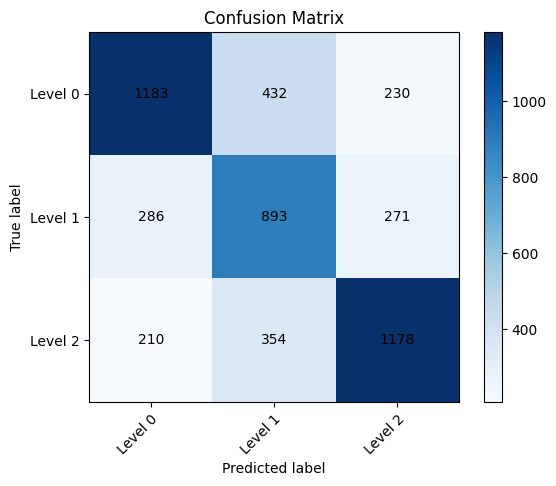

None

test_evaluation:

              precision    recall  f1-score   support

     Level 1       0.62      0.57      0.59       458
     Level 2       0.43      0.52      0.47       342
     Level 3       0.63      0.57      0.60       460

    accuracy                           0.56      1260
   macro avg       0.56      0.55      0.55      1260
weighted avg       0.57      0.56      0.56      1260



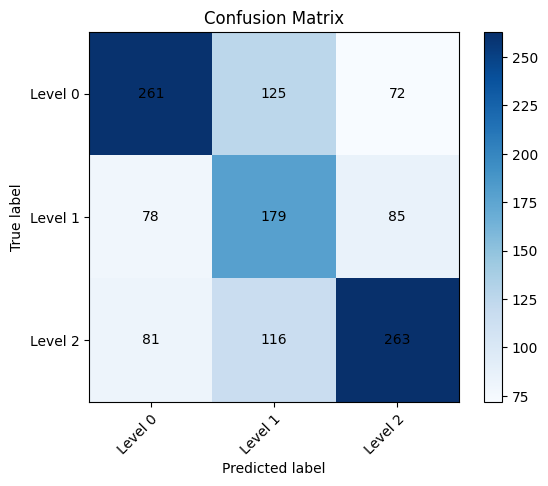

None
None
Feature Importance Rankings:
1. no_of_variables: 11.8644068993144
2. ADJ: 9.19574926865159
3. no_of_equations: 8.695167628887203
4. word_count: 6.485535590372514
5. large_words: 4.771154991109173
6. NOUN: 4.547304876923105
7. has_exp_or_mod: 4.117887014442156
8. VERB: 4.021406931536296
9. words_per_sentence: 3.997843100651587
10. has_fraction: 3.9301672547604665
11. has_eq_or_neq: 3.457709731049969
12. DET: 3.419859104680354
13. PUNCT: 3.2792998112813243
14. average_word_length: 3.2269112948766665
15. ADP: 2.9636529646764243
16. type: 2.5811319416626692
17. AUX: 2.1823794954036786
18. ADV: 2.082344467488912
19. CCONJ: 2.048481964739871
20. PRON: 1.951508633149441
21. SCONJ: 1.9315891454918466
22. NUM: 1.8507756332466474
23. PROPN: 1.7297022646337195
24. CARDINAL: 1.1108006416461205
25. sentence_count: 0.702517274816786
26. has_repeated_large_words: 0.573026640658864
27. DATE: 0.5108304200706576
28. X: 0.49369473798301367
29. ORG: 0.3613298181117021
30. PERSON: 0.3254854802624

In [61]:
model(data, test_size = 0.2, use_smote_technique = 1, combination = 2, combination_required = 1)

<ipython-input-72-932cb3015728>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level'][i] = 'Level 3'
<ipython-input-72-932cb3015728>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level'][i] = 'Level 2'


Best Parameters:  {'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'oob_score': True}
Best Score:  0.6112839483579735
train_evaluation:

              precision    recall  f1-score   support

     Level 1       0.06      0.78      0.12        23
     Level 2       0.62      0.63      0.62      1398
     Level 3       0.81      0.69      0.75      1967

    accuracy                           0.67      3388
   macro avg       0.50      0.70      0.50      3388
weighted avg       0.73      0.67      0.69      3388



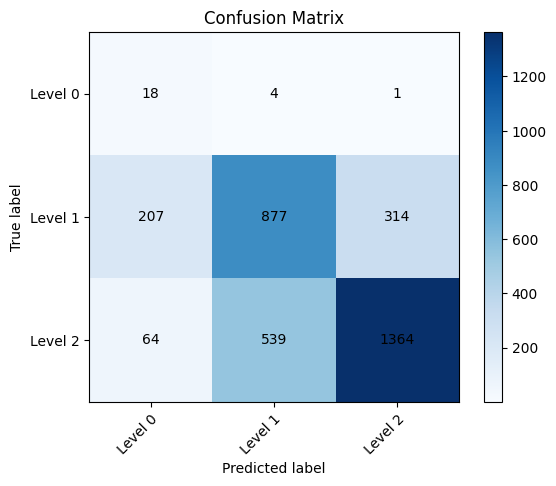

None

test_evaluation:

              precision    recall  f1-score   support

     Level 1       0.05      0.67      0.10         6
     Level 2       0.58      0.55      0.56       377
     Level 3       0.73      0.66      0.70       465

    accuracy                           0.61       848
   macro avg       0.46      0.63      0.45       848
weighted avg       0.66      0.61      0.63       848



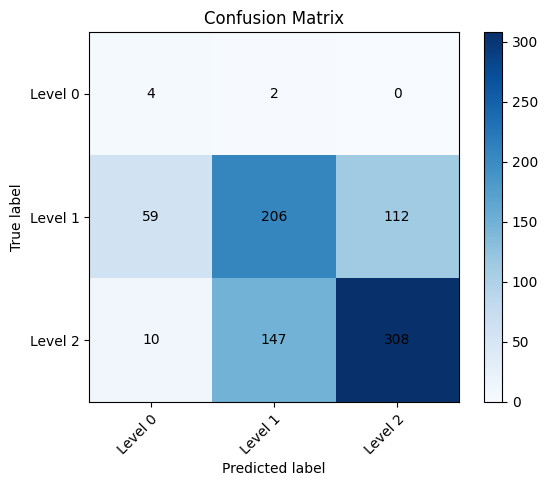

None
None
Feature Importance Rankings:
1. large_words: 9.803066189243276
2. no_of_variables: 8.400901708563898
3. word_count: 7.837594355397217
4. VERB: 6.870096307086622
5. ADJ: 6.317304365456376
6. has_eq_or_neq: 5.566687599155488
7. words_per_sentence: 5.5285155932151415
8. no_of_equations: 5.284016291140366
9. NOUN: 5.2114856927984405
10. ADP: 4.16784435510444
11. PUNCT: 3.990272904460654
12. DET: 2.8990734840540973
13. average_word_length: 2.5915451217182586
14. has_exp_or_mod: 2.568785700852959
15. SCONJ: 2.2605976612219534
16. NUM: 2.245499582459493
17. CARDINAL: 2.1667065258170215
18. AUX: 2.094882777804759
19. PRON: 2.0506840997917184
20. has_fraction: 1.380892541752917
21. ADV: 1.3011381815965677
22. type: 1.29008286037257
23. PROPN: 1.2410185759692272
24. sentence_count: 0.9885264577812738
25. CCONJ: 0.7850061232053493
26. ORG: 0.6379415068721415
27. PART: 0.5992319351591413
28. SYM: 0.5296076273073963
29. has_repeated_large_words: 0.4488273055511234
30. DATE: 0.441773544479

In [78]:
model(data, test_size = 0.2, use_smote_technique = 0, combination = 3, combination_required = 1)

<ipython-input-87-932cb3015728>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level'][i] = 'Level 3'
<ipython-input-87-932cb3015728>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['level'][i] = 'Level 2'


Class distribution before SMOTE: Counter({'Level 3': 2099, 'Level 2': 1775, 'Level 1': 362})
Class distribution after SMOTE: Counter({'Level 3': 2099, 'Level 2': 2099, 'Level 1': 2099})
Best Parameters:  {'criterion': 'log_loss', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'oob_score': True}
Best Score:  0.6396634274365158
train_evaluation:

              precision    recall  f1-score   support

     Level 1       0.87      0.73      0.79      1995
     Level 2       0.46      0.64      0.53      1199
     Level 3       0.76      0.69      0.73      1843

    accuracy                           0.70      5037
   macro avg       0.70      0.69      0.68      5037
weighted avg       0.73      0.70      0.71      5037



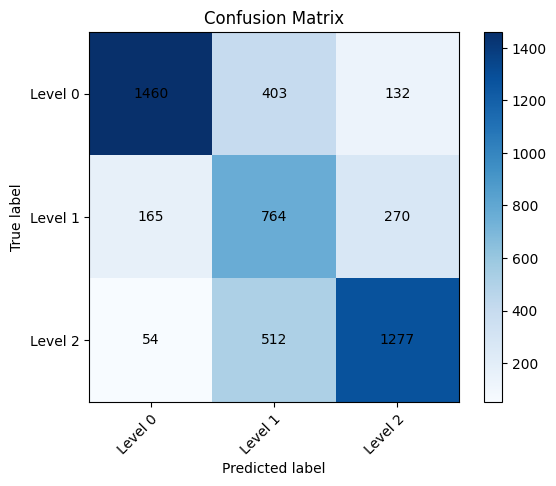

None

test_evaluation:

              precision    recall  f1-score   support

     Level 1       0.79      0.70      0.74       473
     Level 2       0.38      0.49      0.43       324
     Level 3       0.70      0.63      0.66       463

    accuracy                           0.62      1260
   macro avg       0.62      0.61      0.61      1260
weighted avg       0.65      0.62      0.63      1260



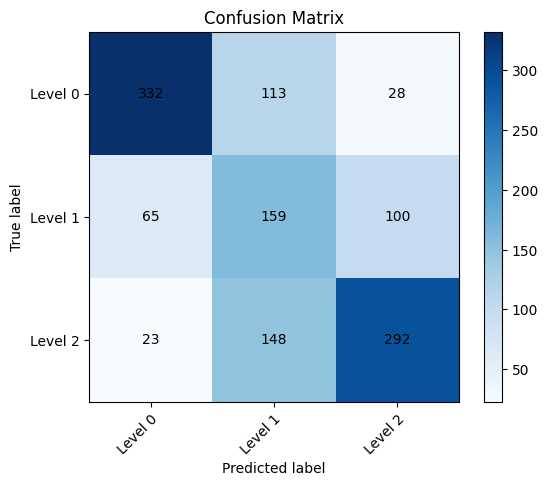

None
None
Feature Importance Rankings:
1. large_words: 10.92543587962754
2. no_of_variables: 10.846117943619191
3. ADJ: 7.30064603725428
4. average_word_length: 6.3693231271215485
5. word_count: 6.2355373411152355
6. VERB: 6.214601346859584
7. no_of_equations: 5.961401061292242
8. has_eq_or_neq: 5.746260271007478
9. ADP: 4.931817387027114
10. PUNCT: 3.8445074806824167
11. DET: 3.551007661643114
12. words_per_sentence: 3.1449831149612475
13. has_exp_or_mod: 2.544146193727995
14. has_fraction: 2.3740019482451755
15. AUX: 2.264798427288327
16. NOUN: 2.245089411751022
17. CCONJ: 1.839766042805941
18. SCONJ: 1.8168343298131395
19. type: 1.577773814141188
20. NUM: 1.3639107396054784
21. CARDINAL: 1.36169371862498
22. PRON: 1.1983748497503917
23. PROPN: 1.1883626914320702
24. ADV: 0.8007467245024883
25. sentence_count: 0.735543048630978
26. ORG: 0.6976891024339448
27. SYM: 0.6046277842795669
28. X: 0.528218205834256
29. DATE: 0.2765593568143639
30. has_repeated_large_words: 0.2573599816856328

In [93]:
model(data, test_size = 0.2, use_smote_technique = 1, combination = 3, combination_required = 1)